In [2]:
import netCDF4
import os
from glob import glob
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
import pickle as pickle

In [3]:
basedir = '/Users/dporter/Documents/data_local/'
datadir = 'Antarctica/Geophysical/Scheinert_2016/'
suffix = '.nc'

# infile = 'R' + float + '_0033'
# nc_file = os.path.join(basedir, datadir, infile + suffix)
# nc_fid = netCDF4.Dataset(nc_file, 'r')

pattern = os.path.join(basedir, datadir, 'antgg*' + suffix)
# pattern = './data/NetCDF/10103/R10103_003*.nc'
filenames = sorted(glob(pattern))  # , key=alphanum_key)
print filenames

nc_fid = netCDF4.Dataset(filenames[0], 'r')
# nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)
nc_vars = [var for var in nc_fid.variables]
nc_dims = [dim for dim in nc_fid.dimensions]
# print nc_vars
# print nc_dims

for vnum, var in enumerate(nc_vars, start=0):
    if var not in nc_dims:
        ###
#         print nc_fid.variables[var].dimensions
        try:
            globals()[var] = nc_fid.variables[var][:]#.flatten()
            print 'Found %i %s records in %s' % (globals()[var].size, str(var), str(filenames[0]))
        except:
            print 'No %s found in file.' % (str(var))
            globals()[var] = np.full([333, ], np.nan)
            # print 'Original shape of %s: %s' % (nc_vars[vnum], globals()[var].shape)

['/Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc']
Found 444889 longitude records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 latitude records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 ellipsoidal_height records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 orthometric_height records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 free_air_anomaly records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 accuracy_measure records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 bouguer_anomaly records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc


In [39]:
print type(np.array(ellipsoidal_height))
print len(ellipsoidal_height)
print ellipsoidal_height[:]
print type(latitude)
# plt.plot(ellipsoidal_height)

<type 'numpy.ndarray'>
667
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]
<type 'numpy.ndarray'>


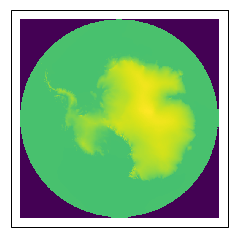

In [45]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.SouthPolarStereo())
# ax.set_extent([-180, 180, -90, -60])
plt.pcolormesh(longitude, latitude, BOU['ell'], transform=ccrs.PlateCarree())
# ax.coastlines()
plt.show()

In [40]:
# Make an empty 'dictionary'... place the 3 grids in it.
FAG = {}
FAG['lats']=latitude
FAG['lons']=longitude
FAG['fag']=np.array(free_air_anomaly)
# Save (i.e. pickle) the data for later use
# This saves the variable TOPO (with all its contents) into the file: topo.p
# pickle.dump(FAG, open('antgg2015_fag.p','wb'))
np.ma.dump(FAG, open('antgg2015_fag.p','wb'))
FAG

{'fag': array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ..., 
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]]),
 'lats': array([[-48.49868444, -48.5558271 , -48.61290439, ..., -48.61290439,
         -48.5558271 , -48.49868444],
        [-48.5558271 , -48.61307673, -48.67026115, ..., -48.67026115,
         -48.61307673, -48.5558271 ],
        [-48.61290439, -48.67026115, -48.72755283, ..., -48.72755283,
         -48.67026115, -48.61290439],
        ..., 
        [-48.61290439, -48.67026115, -48.72755283, ..., -48.72755283,
         -48.67026115, -48.61290439],
        [-48.5558271 , -48.61307673, -48.67026115, ..., -48.67026115,
         -48.61307673, -48.5558271 ],
        [-48.49868444, -48.5558271 , 

In [44]:
# Make an empty 'dictionary'... place the 3 grids in it.
BOU = {}
BOU['lats']=latitude
BOU['lons']=longitude
BOU['bou']=np.array(bouguer_anomaly)
BOU['ell']=np.array(ellipsoidal_height)
# Save (i.e. pickle) the data for later use
# This saves the variable TOPO (with all its contents) into the file: topo.p
pickle.dump(BOU, open('antgg2015_bouger.p','wb'))
BOU['ell']

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ..., 
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

# Debug

In [7]:
from shapely import speedups;

assert speedups.available;

speedups.enable()

from shapely.geometry import LineString

ls = LineString([(0, 0), (10, 0)])
# On OSX causes an abort trap, due to https://github.com/Toblerity/Shapely/issues/177 
r = ls.wkt
area = ls.buffer(10).area

In [8]:
area

513.6548490545939